In [ ]:
# HYPOTHESIS TESTING

In [ ]:
# Hypothesis 3:
# Bigger teams are more diverse.

In [1]:
# >>> Preparation
import pandas

print("Importing publications... ")
cols = [
    'key', 
    'pub_cat',
    'pub_type',
    'title',
    'year',
    'authors',
    'n_authors',
    'n_males',
    'n_females',
    'n_unknown',
    'ratio',
    'n_contribs_females',
    'n_contribs_males',
    'n_contribs_unknown'
]

publs = pandas.read_csv("../_data/publications.csv", usecols=cols)

# Setting index & accessing cells: https://pythonhow.com/accessing-dataframe-columns-rows-and-cells/
publs = publs.set_index("key", drop = False)
print("Publications imported. They look like this: {}".format(publs[:1]))

Importing publications... 


C:\Program_Files\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Publications imported. They look like this:                                  key pub_cat pub_type  \
key                                                     
books/acm/0082477  books/acm/0082477    book      NaN   

                                                         title  year  \
key                                                                    
books/acm/0082477  The no-nonsense guide to computing careers.  1992   

                           authors  n_authors  n_males  n_females  n_unknown  \
key                                                                            
books/acm/0082477  ['Marc Rettig']          1      1.0        0.0        0.0   

                   ratio  n_contribs_females  n_contribs_males  \
key                                                              
books/acm/0082477   50.0                 0.0               1.0   

                   n_contribs_unknown  
key                                    
books/acm/0082477                 0.0  


In [2]:
# get only those publications created by teams
print("Getting data to analyze, including absolute ratio values...")
team_publs = publs[publs['n_authors'] > 1]
not_all_unknown = team_publs[team_publs["n_unknown"] != team_publs["n_authors"]]
abs_not_all_unknown = not_all_unknown
abs_not_all_unknown["ratio"] = abs(abs_not_all_unknown["ratio"])
print("Done. Can analyze {} publications.".format(len(not_all_unknown)))

Getting data to analyze, including absolute ratio values...
Done. Can analyze 3020710 publications.


C:\Program_Files\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [ ]:
# >>> Testing

In [3]:
from scipy import stats
print("Calculating Spearman's Correlation Coefficient...")
small_teams_cor_l = stats.spearmanr(abs_not_all_unknown["ratio"], abs_not_all_unknown["n_authors"])
print(small_teams_cor_l)
print("Done!")

Calculating Spearman's Correlation Coefficient...
SpearmanrResult(correlation=-0.15007747918554523, pvalue=0.0)
Done!


In [4]:
print("Calculating distribution statistic median per team size")
team_publs_by_n_authors = not_all_unknown.groupby("n_authors")

team_ratio_median = team_publs_by_n_authors.agg({'ratio':'median'})
team_ratio_median["n_authors"] = team_ratio_median.index.values.tolist()
print("Done!")

Calculating distribution statistic median per team size
Done!


In [5]:
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rcParams['pgf.rcfonts'] = False
mpl.rcParams['font.size'] = 11.0

Visualizing Scatter graph for all Gender Balance Indices and drawing the Median per team size...


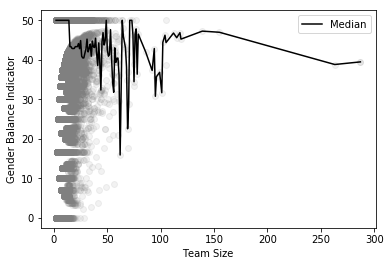

File saved at ../_graphs/h3/ratio_by_team_size_scatter


In [6]:
# >>> Visualization
print("Visualizing Scatter graph for all Gender Balance Indices and drawing the Median per team size...")
plt.scatter(not_all_unknown["n_authors"], not_all_unknown["ratio"], color="grey", alpha=0.1, label="")
plt.plot(team_ratio_median["n_authors"], team_ratio_median["ratio"], label="Median", color="black")

plt.xlabel("Team Size")
plt.ylabel("Gender Balance Indicator")
plt.legend()

plt.savefig('../_graphs/h3/ratio_by_team_size_scatter.png')

plt.show()

print("File saved at ../_graphs/h3/ratio_by_team_size_scatter")

In [ ]:
# >>> Interpretation:
# It remains unknown whether Hypothesis 3 is correct or not.